# beschrijving persoonlijk uitstapje
Voor mijn persoonlijk uitstapje wil ik huisprijzen voorspellen gebaseerd op een dataset met heel veel features(79). Ik heb hiervoor gekozen om extra nadruk te kunnen leggen op feature selection.\
De eerste stap die ik neem in dit persoonlijk uitstapje is om bekend te worden met de data. Hiervoor kijk ik naar:
* De metadata van de dataset om te weten wat de data in iedere kolom betekent
* De head() functie om te kijken hoe die data eruit ziet
* De describe() functie om te kijken of er abnormaliteiten zijn in de numerieke data.

### Korte omschrijving van de kolommen
    SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [25]:
data = pd.read_csv('train.csv')
data.dropna(subset=['SalePrice'], inplace=True)

train, test = train_test_split(data, test_size=0.3, random_state=42)
print(f'{len(data)} in dataset: {len(train)} in training set, {len(test)} in test set')
data.head(10)

1460 in dataset: 1022 in training set, 438 in test set


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [26]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Nu dat ik meer verstand heb van de data ga ik de features normalizeren en een correlatie matrix maken.

In [27]:
# normalize the numeric features
numeric_features = train.select_dtypes(include=[np.number])
numeric_features = numeric_features.drop(columns=['Id', 'SalePrice'])
numeric_features = (numeric_features - numeric_features.mean()) / numeric_features.std()
numeric_features = numeric_features.fillna(0)
numeric_features = numeric_features.join(train['SalePrice'])
print(numeric_features.head(10))

      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
135    -0.868524     0.376954 -0.030489     0.635719     0.392074  -0.032362   
1452    2.881208    -1.385429 -0.624059    -0.822654    -0.508375   1.105893   
762     0.068909     0.063642 -0.185833     0.635719    -0.508375   1.235979   
932    -0.868524     0.533610  0.081605     2.094093    -0.508375   1.138414   
435     0.068909    -1.072116 -0.006923     0.635719     0.392074   0.813199   
629     0.537625     0.455282 -0.152293    -0.093467    -0.508375  -0.227492   
1210    0.068909    -0.014687  0.041710    -0.093467    -0.508375   0.683112   
1118    0.537625     0.572775  0.271812    -0.822654     0.392074  -0.422621   
1084    0.068909     0.000000  0.201731    -0.093467    -0.508375   0.780677   
158     0.068909     1.160236  0.159453     0.635719    -0.508375   1.073371   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
135      -0.711296    1.058082   -0.970009  

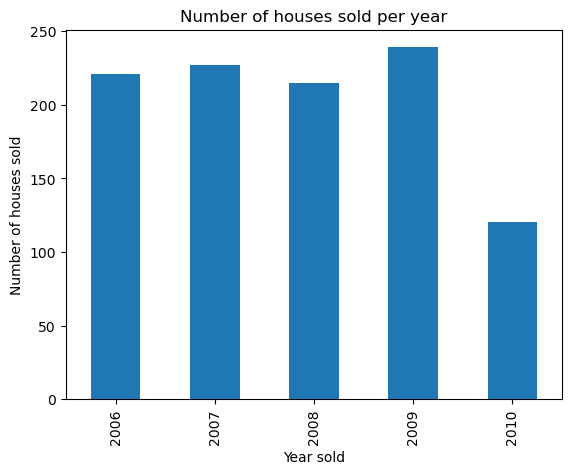

In [28]:
train['YrSold'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of houses sold per year')
plt.xlabel('Year sold')
plt.ylabel('Number of houses sold')
plt.show()

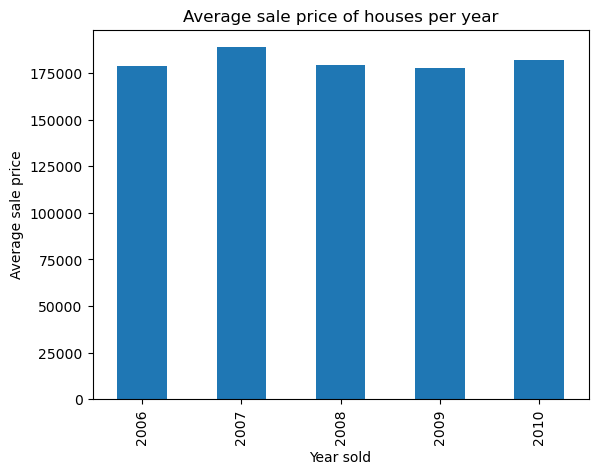

In [29]:
# plot the average sale price per year
train.groupby('YrSold')['SalePrice'].mean().plot(kind='bar')
plt.title('Average sale price of houses per year')
plt.xlabel('Year sold')
plt.ylabel('Average sale price')
plt.show()

<Axes: >

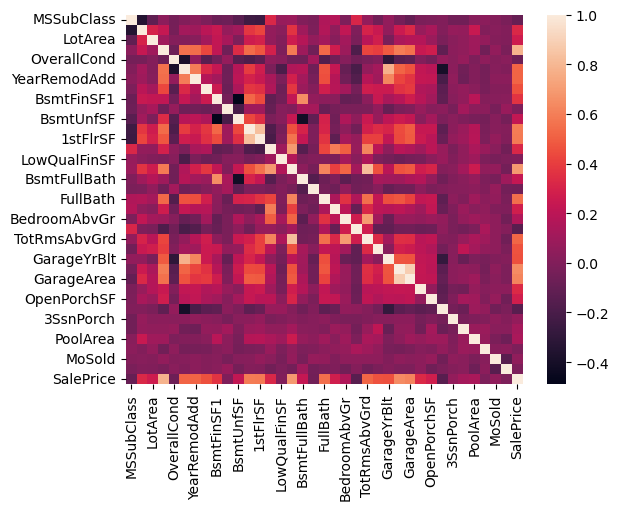

In [30]:
# plot the correlation matrix of numeric features
corr = numeric_features.corr()
sns.heatmap(corr)

<Axes: >

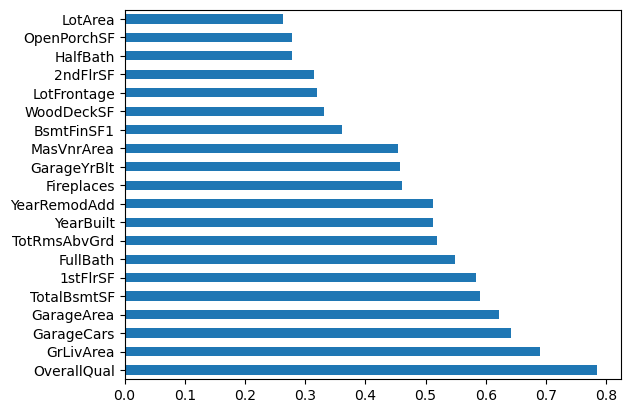

In [31]:
# plot the features with the highest sale price correlation as a bar plot
corr['SalePrice'].drop(['SalePrice']).sort_values(ascending=False).head(20).plot(kind='barh')

# Definiëren van de functies om de modellen trainen

In [32]:
def get_high_corr_columns(corr, threshold):
    high_corr_columns = [column for column in corr.columns if corr['SalePrice'][column] > threshold]
    high_corr_columns.remove('SalePrice')
    return high_corr_columns


In [33]:
def train_logistic_regression_model(train, test, features):
    X_train = train[features]
    y_train = train['SalePrice']
    X_test = test[features]
    y_test = test['SalePrice']

    model = tree.DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return model, rmse

In [34]:
def train_tree_model(train, test, colums):
    depths = range(1, 15)
    train_rmses = []
    test_rmses = []
    for i in depths:
        regr = tree.DecisionTreeRegressor(max_depth=i)
        regr.fit(train[high_corr_columns], train['SalePrice'])
        train_rmse = metrics.root_mean_squared_error(train['SalePrice'], regr.predict(train[high_corr_columns]))
        test_rmse = metrics.root_mean_squared_error(test['SalePrice'], regr.predict(test[high_corr_columns]))
        train_rmses.append(train_rmse)
        test_rmses.append(test_rmse)
    return train_rmses, test_rmses, depths

In [35]:
def train_forest_model(train, test, colums):
    depths = range(1, 15)
    train_rmses = []
    test_rmses = []
    for i in depths:
        regr = RandomForestRegressor(n_estimators=100, max_depth=i)
        regr.fit(train[high_corr_columns], train['SalePrice'])
        train_rmse = metrics.root_mean_squared_error(train['SalePrice'], regr.predict(train[high_corr_columns]))
        test_rmse = metrics.root_mean_squared_error(test['SalePrice'], regr.predict(test[high_corr_columns]))
        train_rmses.append(train_rmse)
        test_rmses.append(test_rmse)
    return train_rmses, test_rmses, depths

# Trainen van modellen gebaseerd op numeriek features met corr_coeff boven 0.5

RMSE: 40317.597147405584 or 22.28%


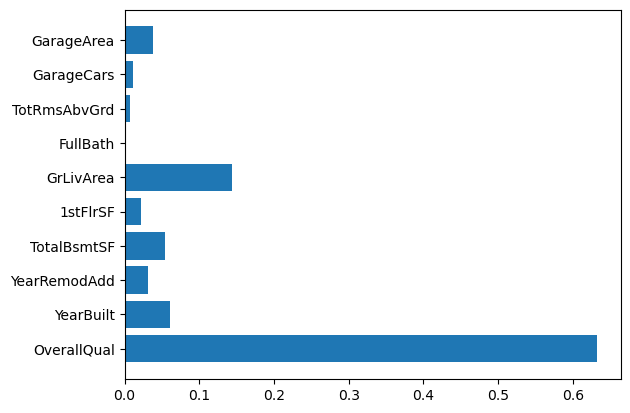

In [36]:
high_corr_columns = get_high_corr_columns(corr, 0.5)
logistic_model1, logistic_rmse1 = train_logistic_regression_model(train, test, high_corr_columns)
print(f'RMSE: {logistic_rmse1} or {logistic_rmse1 / data["SalePrice"].mean():.2%}')

plt.barh(high_corr_columns, logistic_model1.feature_importances_)
plt.show()

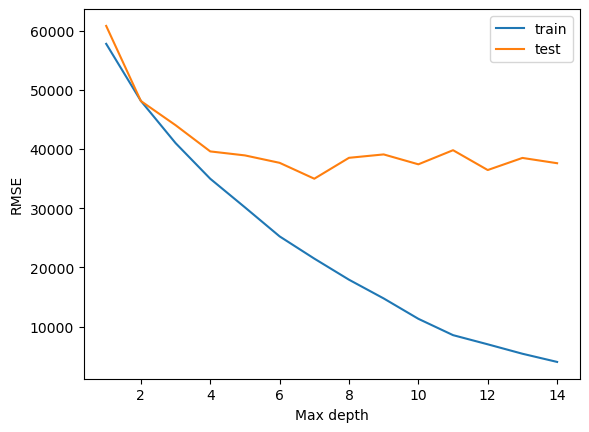

In [37]:
tree_train_rmses1, tree_test_rmses1, depths = train_tree_model(train, test, high_corr_columns)

plt.plot(depths,tree_train_rmses1, label='train')
plt.plot(depths, tree_test_rmses1, label='test')
plt.xlabel('Max depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

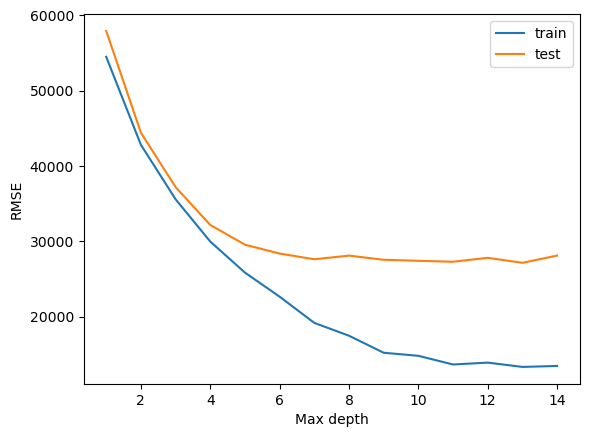

In [38]:
forest_train_rmses1, forest_test_rmses1, depths = train_forest_model(train, test, high_corr_columns)

plt.plot(depths, forest_train_rmses1, label='train')
plt.plot(depths, forest_test_rmses1, label='test')
plt.xlabel('Max depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Trainen van modellen gebaseerd op numeriek features met corr_coeff boven 0.6

RMSE: 42614.96443447891 or 23.55%


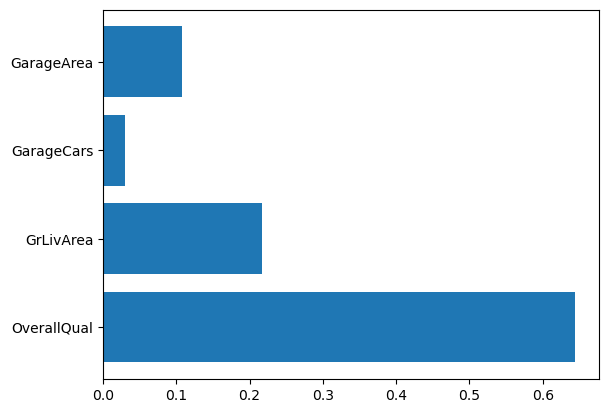

In [39]:
high_corr_columns = get_high_corr_columns(corr, 0.6)
logistic_model2, logistic_rmse2 = train_logistic_regression_model(train, test, high_corr_columns)
print(f'RMSE: {logistic_rmse2} or {logistic_rmse2 / data["SalePrice"].mean():.2%}')
plt.barh(high_corr_columns, logistic_model2.feature_importances_)
plt.show()

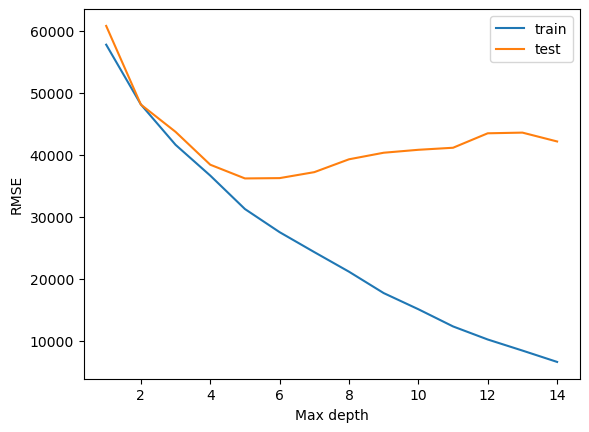

In [40]:
tree_train_rmses2, tree_test_rmses2, depths = train_tree_model(train, test, high_corr_columns)

plt.plot(depths, tree_train_rmses2, label='train')
plt.plot(depths, tree_test_rmses2, label='test')
plt.xlabel('Max depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

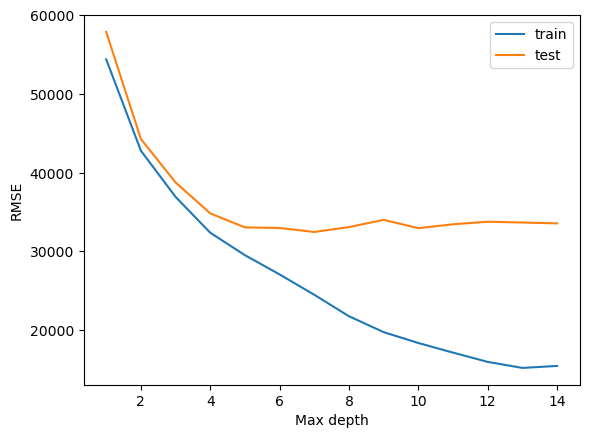

In [41]:
forest_train_rmses2, forest_test_rmses2, depths = train_forest_model(train, test, high_corr_columns)

plt.plot(depths, forest_train_rmses2, label='train')
plt.plot(depths, forest_test_rmses2, label='test')
plt.xlabel('Max depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [42]:
mean_price = data['SalePrice'].mean()
print(f'Average sale price: {mean_price}\n')
print('Logistic Models')
print(f'RMSE of the logistic regression model using numerical features with a correlation above 0.5: {logistic_rmse1} or {logistic_rmse1 / mean_price * 100:.2f}%')
print(f'RMSE of the logistic regression model using numerical features with a correlation above 0.6: {logistic_rmse2} or {logistic_rmse2 / mean_price * 100:.2f}%\n')
print('Tree Models')
print(f'Best depth for the tree model using numerical features with a correlation above 0.5: {depths[np.argmin(tree_test_rmses1)]}. On average, the model is off by {tree_test_rmses1[np.argmin(tree_test_rmses1)]} or {tree_test_rmses1[np.argmin(tree_test_rmses1)] / mean_price * 100:.2f}%')
print(f'Best depth for the tree model using numerical features with a correlation above 0.6: {depths[np.argmin(tree_test_rmses2)]}. On average, the model is off by {tree_test_rmses2[np.argmin(tree_test_rmses2)]} or {tree_test_rmses2[np.argmin(tree_test_rmses2)] / mean_price * 100:.2f}%\n')
print('Forest Models')
print(f'Best depth for the forest model using numerical features with a correlation above 0.5: {depths[np.argmin(forest_test_rmses1)]}. On average, the model is off by {forest_test_rmses1[np.argmin(forest_test_rmses1)]} or {forest_test_rmses1[np.argmin(forest_test_rmses1)] / mean_price * 100:.2f}%')
print(f'Best depth for the forest model using numerical features with a correlation above 0.6: {depths[np.argmin(forest_test_rmses2)]}. On average, the model is off by {forest_test_rmses2[np.argmin(forest_test_rmses2)]} or {forest_test_rmses2[np.argmin(forest_test_rmses2)] / mean_price * 100:.2f}%')

Average sale price: 180921.19589041095

Logistic Models
RMSE of the logistic regression model using numerical features with a correlation above 0.5: 40317.597147405584 or 22.28%
RMSE of the logistic regression model using numerical features with a correlation above 0.6: 42614.96443447891 or 23.55%

Tree Models
Best depth for the tree model using numerical features with a correlation above 0.5: 7. On average, the model is off by 34992.80278373615 or 19.34%
Best depth for the tree model using numerical features with a correlation above 0.6: 5. On average, the model is off by 36203.996247918716 or 20.01%

Forest Models
Best depth for the forest model using numerical features with a correlation above 0.5: 13. On average, the model is off by 27145.366738870354 or 15.00%
Best depth for the forest model using numerical features with a correlation above 0.6: 7. On average, the model is off by 32476.27824819481 or 17.95%
